In [1]:
# Library Imports
import pandas as pd
import joblib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

In [ ]:
# Load processed dataset
df = pd.read_csv("../data/processed_students_for_model.csv")
target = "dropout_label_quantile"

X = df.drop(columns=[target])
y = df[target]

print("Dataset shape:", df.shape)
print("Positive class ratio:", y.mean())

Dataset shape: (1044, 48)
Positive class ratio: 0.20019157088122605


In [ ]:
# Data Spliting into training and testing sizes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       167
           1       0.95      0.83      0.89        42

    accuracy                           0.96       209
   macro avg       0.95      0.91      0.93       209
weighted avg       0.96      0.96      0.96       209

Confusion Matrix:
 [[165   2]
 [  7  35]]
ROC-AUC: 0.9934416880524665


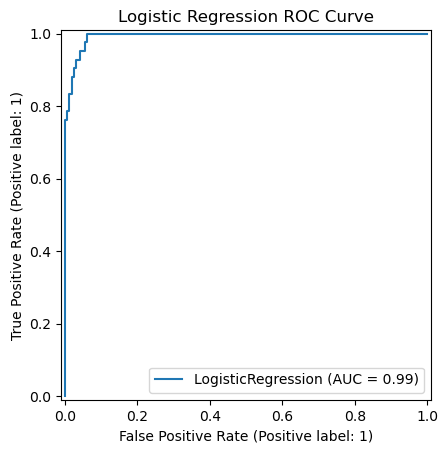

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("\n=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# ROC-AUC
y_prob_lr = log_reg.predict_proba(X_test)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Logistic Regression ROC Curve")
plt.show()


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       167
           1       1.00      0.98      0.99        42

    accuracy                           1.00       209
   macro avg       1.00      0.99      0.99       209
weighted avg       1.00      1.00      1.00       209

Confusion Matrix:
 [[167   0]
 [  1  41]]
ROC-AUC: 0.9991445680068434


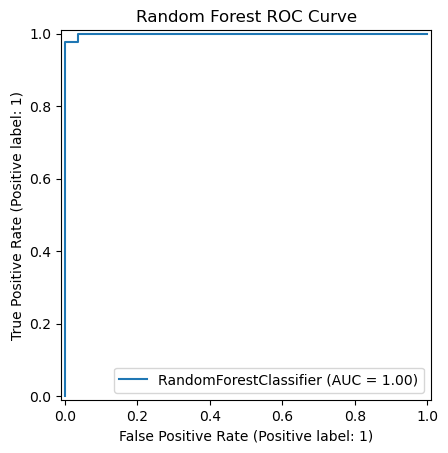

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

y_prob_rf = rf.predict_proba(X_test)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest ROC Curve")
plt.show()

In [ ]:
# Saving the best model
joblib.dump(rf, "../model/model.joblib")
print("Saved model to ../model/model.joblib")


Saved model to ../model/model.joblib



Top 10 Features:
risk_score            0.321103
G3                    0.142344
passed_final          0.098499
dropout_label_rule    0.094223
avg_grade             0.083659
G2                    0.060151
absences              0.044778
G1                    0.036438
grade_trend           0.032747
failures              0.012984
dtype: float64


C:\Users\Niphe\AppData\Local\Temp\ipykernel_26256\2743852314.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.head(10), y=feat_imp.head(10).index, palette="viridis")


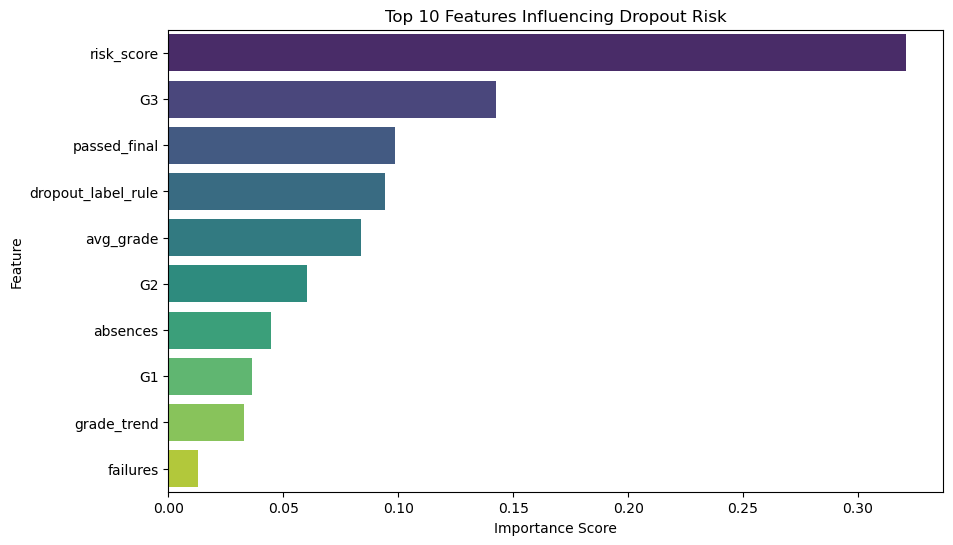

In [ ]:
# Feature importance visualization

importances = rf.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Print top 10
print("\nTop 10 Features:")
print(feat_imp.head(10))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.head(10), y=feat_imp.head(10).index, palette="viridis")
plt.title("Top 10 Features Influencing Dropout Risk")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Save to CSV
feat_imp.to_csv("../model/feature_importance.csv")
